In [146]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r'c:\windows\fonts\simsun.ttc',size = 20) 


In [147]:
#wind导不出数据直接读入数据
from WindPy import *
w.start()
#策略截至时间为2022年12月31日
dateStart =  date(2005,1,1)
dateEnd = date(2022,12,31)

IndexClose = w.wsd("000300.SH,000905.SH", "close", "{}".format(dateStart), "{}".format(dateEnd), "")
priceData = pd.DataFrame(np.array(IndexClose.Data).T,columns=['HS300','ZZ500'],index = IndexClose.Times)

In [148]:
'''
读取数据,wind用不了直接读取数据priceData
'''

'\n读取数据\npriceData\n'

C:\Users\user\AppData\Local\Temp\ipykernel_1560\470014921.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xticks = np.arange(0,priceData.shape[0]+1,np.int((priceData.shape[0]+1)/5))


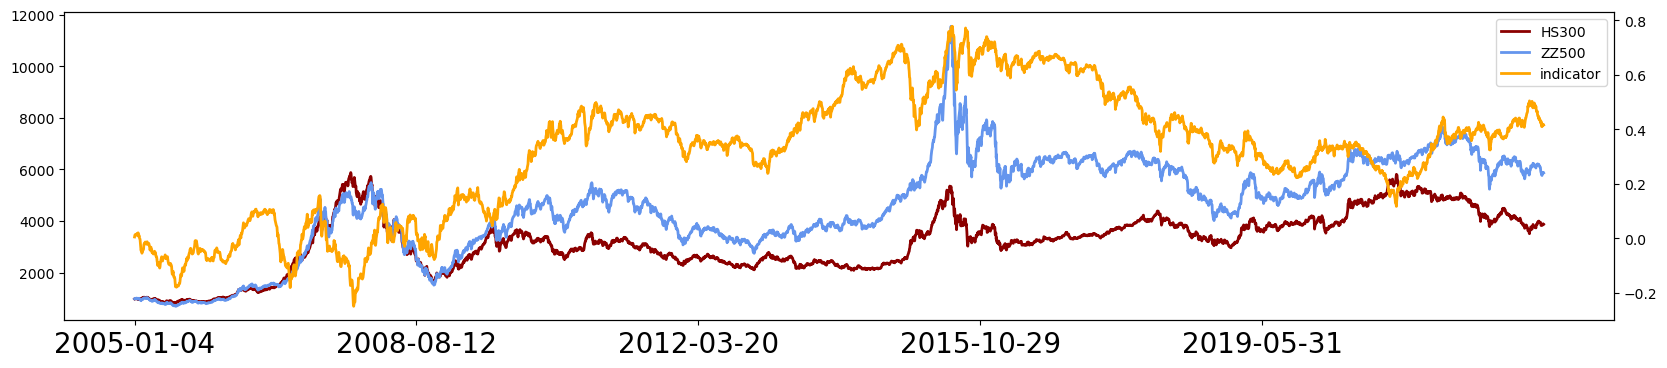

In [149]:
#小盘股相对优势指标
##如果指标处于上升趋势，说明中证500指数相对沪深300指数走强, 应投资中证500指数. 
##如果指标处于下降趋势，说明中证500指数相对沪深300指数走弱, 应投资沪深300指数.
###沪深300做大盘指标，中证500做小盘指标
priceData['IndicatorValue'] = np.log(priceData['ZZ500']) - np.log(priceData['HS300'])
#拿序列代替时间
X = np.arange(priceData.shape[0])
xticklabel = priceData.index
xticks = np.arange(0,priceData.shape[0]+1,np.int((priceData.shape[0]+1)/5))

plt.figure(figsize = [20,4])

#指标和指数的数量级不同，需要辅助轴
SP = plt.axes() 
P1 = SP.plot(X,priceData['HS300'],linewidth = 2,label = 'HS300',color = 'darkred')
P2 = SP.plot(X,priceData['ZZ500'],linewidth = 2,label = 'ZZ500',color = 'cornflowerblue')
     
SP1 = SP.twinx()
P3 = SP1.plot(X,priceData['IndicatorValue'],color = 'orange',linewidth = 2,label = 'indicator')   

SP.set_xticks(xticks)
SP.set_xticklabels(xticklabel[xticks],size = 20)

p = P1+P2+P3
lns = [l.get_label() for l in p]

plt.legend(p,lns)
plt.show()

In [145]:
priceData

,HS300,ZZ500,IndicatorValue,upbound,downbound,ma10
2005-01-04,982.794,986.927,0.004197,NaN,NaN,NaN
2005-01-05,992.564,1003.633,0.011090,NaN,NaN,NaN
2005-01-06,983.174,994.595,0.011550,NaN,NaN,NaN
2005-01-07,983.958,997.606,0.013775,NaN,NaN,NaN
2005-01-10,993.879,1006.337,0.012457,NaN,NaN,NaN
...,...,...,...,...,...,...
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
#添加上下界
###其中n可以取半年即n=120交易日
def updownbound(data,n,c):   
    data['upbound'] = data['IndicatorValue'].rolling(window = n).mean() + c * data['IndicatorValue'].rolling(window = n).std()
    #data['upbound'] = data['upbound'].shift(1)
    data['downbound'] = data['IndicatorValue'].rolling(window = n).mean() - c * data['IndicatorValue'].rolling(window = n).std()
    #data['downbound'] = data['downbound'].shift(1)
    data['ma10']=data['IndicatorValue'].rolling(window = 10).mean()
    #data['ma10']=data['ma10'].shift(1)
    
    '''   
    #填补滚动造成的上下界缺失值
    data.loc[0,'upbound'] = 0
    data.loc[0,'downbound'] = 0 
    data.loc[1,'upbound'] = data.loc[0,'IndicatorValue']
    data.loc[1,'downbound'] = data.loc[0,'IndicatorValue']
    
    #补充前n天的移动平均值
    for i in range(2,n):
        data.iloc[i,3] = data.iloc[0:i-1,2].mean() + c * data.iloc[0:i -1,2].std()
        data.iloc[i,4] = data.iloc[0:i-1 ,2].mean() - c * data.iloc[0:i-1,2].std()

'''
    return data

In [157]:
data1=updownbound(priceData.copy(),10,2)

C:\Users\user\AppData\Local\Temp\ipykernel_1560\3648285044.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xticks_1 = np.arange(0,num,np.int((num+1)/5))


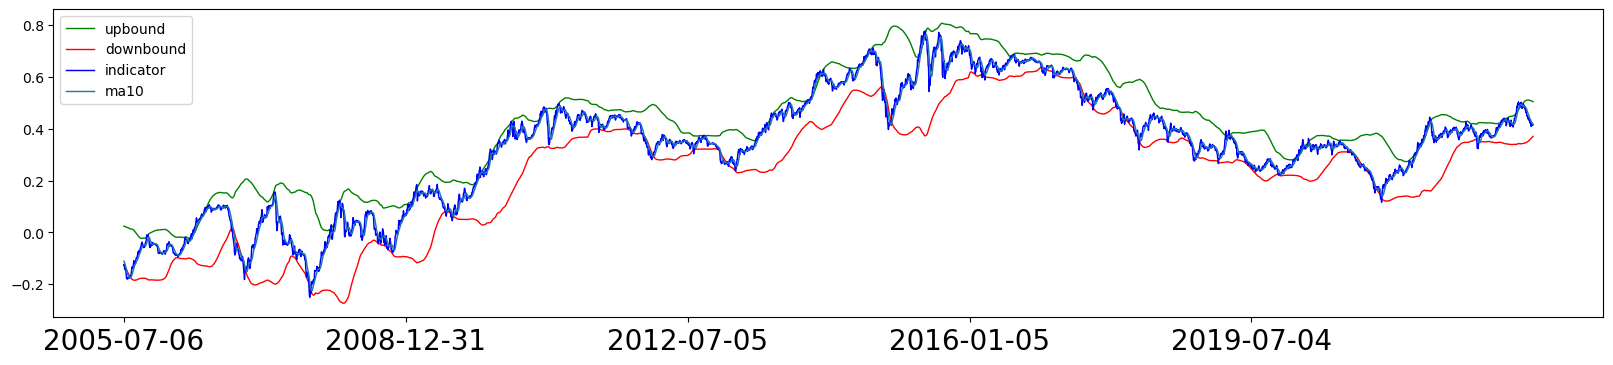

In [173]:
data1=updownbound(priceData.copy(),120,2)#复制priceData,防止污染原数据
#这里上下界为n=120时的上下界，但MA=10维持不变，n=10时的布林带和ma10趋势高度相似，与研报作图不同
#拿序列代替时间
num=data1['upbound'].dropna().shape[0]
X1 = np.arange(num)
xticklabel_1 = data1.index[-num:]
xticks_1 = np.arange(0,num,np.int((num+1)/5))

plt.figure(figsize = [20,4])

#指标和指数的数量级不同，需要辅助轴
SP2 = plt.axes() 
P11 = SP2.plot(X1,data1['upbound'].dropna(),linewidth = 1,label = 'upbound',color = 'g')
P22 = SP2.plot(X1,data1['downbound'].dropna(),linewidth = 1,label = 'downbound',color = 'r')
     
P33 = SP2.plot(X1,data1['IndicatorValue'].iloc[-num:],color = 'b',linewidth = 1.05,label = 'indicator')   
P44= SP2.plot(X1,data1['ma10'].iloc[-num:],linewidth=1.05,label='ma10')
SP2.set_xticks(xticks_1)
SP2.set_xticklabels(xticklabel_1[xticks_1],size = 20)

P = P11+P22+P33+P44
lns1 = [L.get_label() for L in P]

plt.legend(P,lns1)
plt.show()

In [174]:
data1

,HS300,ZZ500,IndicatorValue,upbound,downbound,ma10
2005-01-04,982.7940,986.9270,0.004197,NaN,NaN,NaN
2005-01-05,992.5640,1003.6330,0.011090,NaN,NaN,NaN
2005-01-06,983.1740,994.5950,0.011550,NaN,NaN,NaN
2005-01-07,983.9580,997.6060,0.013775,NaN,NaN,NaN
2005-01-10,993.8790,1006.3370,0.012457,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-12-26,3843.4887,5843.2555,0.418908,0.506552,0.365488,0.424642
2022-12-27,3887.8540,5885.6622,0.414662,0.506034,0.366714,0.422187
2022-12-28,3871.2644,5862.0967,0.414926,0.505489,0.367978,0.420406
2022-12-29,3856.7007,5857.4021,0.417894,0.504927,0.369302,0.418757


In [193]:
def strategy(data):
    data['flag_hs'] = 0
    data['flag_zz'] = 0
    data['ret_strategy'] = 0
    data['ret_zz'] = data['ZZ500'].pct_change(1)
    data['ret_hs'] = data['HS300'].pct_change(1)
    data.iloc[0,-1] = 0
    data.iloc[0,-2] = 0
    for i in range(1,data.shape[0] - 1):
        # 上穿下轨，做多小盘，卖出大盘
        if data.ma10[i - 1] < data.downbound[i - 1] and data.ma10[i] > data.downbound[i]:
            data['flag_zz'].iloc[i+1] = 1
            data['flag_hs'].iloc[i + 1] = 0
 #           data.loc[i + 1,'net_zz'] = data.loc[i ,'net_zz']*(1 + data.loc[i + 1,'ret_zz'])
 #           data.loc[i + 1,'net_hs'] = data.loc[i ,'net_hs']*(1 - data.loc[i + 1,'ret_hs'])
        # 下穿上轨，做多大盘，卖出小盘
        elif data.ma10[i - 1] > data.upbound[i - 1] and data.ma10[i] < data.upbound[i]:
            data['flag_zz'].iloc[i + 1 ] = 0
            data['flag_hs'].iloc[i + 1 ] = 1
 #           data.loc[i + 1,'net_zz'] = data.loc[i ,'net_zz']*(1 - data.loc[i + 1,'ret_zz'])
 #           data.loc[i + 1,'net_hs'] = data.loc[i ,'net_hs']*(1 + data.loc[i + 1,'ret_hs'])
        else:
            data['flag_zz'].iloc[i+1] = data['flag_zz'].iloc[i]
            data['flag_hs'].iloc[i+1] = data['flag_hs'].iloc[i]
            
    data.loc[data['flag_zz'] ==1,'ret_strategy'] = data.loc[data['flag_zz'] ==1,'ret_zz']
    data.loc[data['flag_hs'] ==1,'ret_strategy'] = data.loc[data['flag_hs'] ==1,'ret_hs']
    
    data['net_strategy_zz'] = (1 + data['flag_zz']*data['ret_zz']).cumprod()
    data['net_strategy_hs'] = (1 + data['flag_hs']*data['ret_hs']).cumprod()
    data['net_strategy'] = (1 + data['ret_strategy']).cumprod()
    return data

In [194]:
data=data1.dropna().copy()
finalData=strategy(data)

C:\Users\user\AppData\Local\Temp\ipykernel_1560\1405005834.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['flag_zz'].iloc[i+1] = data['flag_zz'].iloc[i]
C:\Users\user\AppData\Local\Temp\ipykernel_1560\1405005834.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['flag_hs'].iloc[i+1] = data['flag_hs'].iloc[i]
C:\Users\user\AppData\Local\Temp\ipykernel_1560\1405005834.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [196]:
finalData

,HS300,ZZ500,IndicatorValue,upbound,downbound,ma10,flag_hs,flag_zz,ret_strategy,ret_zz,ret_hs,net_strategy_zz,net_strategy_hs,net_strategy
2005-07-06,842.5560,743.4440,-0.125147,0.024562,-0.128137,-0.110647,0,0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
2005-07-07,844.7290,747.4180,-0.122391,0.023885,-0.129569,-0.112987,0,0,0.000000,0.005345,0.002579,1.000000,1.000000,1.000000
2005-07-08,829.4890,722.8540,-0.137603,0.023281,-0.131444,-0.116794,0,0,0.000000,-0.032865,-0.018041,1.000000,1.000000,1.000000
2005-07-11,824.0970,714.4750,-0.142740,0.022721,-0.133455,-0.121727,0,0,0.000000,-0.011592,-0.006500,1.000000,1.000000,1.000000
2005-07-12,851.8160,739.5340,-0.141350,0.021945,-0.135265,-0.126024,0,0,0.000000,0.035073,0.033636,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,3843.4887,5843.2555,0.418908,0.506552,0.365488,0.424642,1,0,0.003989,0.013865,0.003989,11.763341,1.082757,12.736843
2022-12-27,3887.8540,5885.6622,0.414662,0.506034,0.366714,0.422187,1,0,0.011543,0.007257,0.011543,11.763341,1.095256,12.883864
2022-12-28,3871.2644,5862.0967,0.414926,0.505489,0.367978,0.420406,1,0,-0.004267,-0.004004,-0.004267,11.763341,1.090582,12.828888
2022-12-29,3856.7007,5857.4021,0.417894,0.504927,0.369302,0.418757,1,0,-0.003762,-0.000801,-0.003762,11.763341,1.086479,12.780626


C:\Users\user\AppData\Local\Temp\ipykernel_1560\3796121507.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xticks = np.arange(0,finalData.shape[0],np.int((finalData.shape[0]+1)/5))


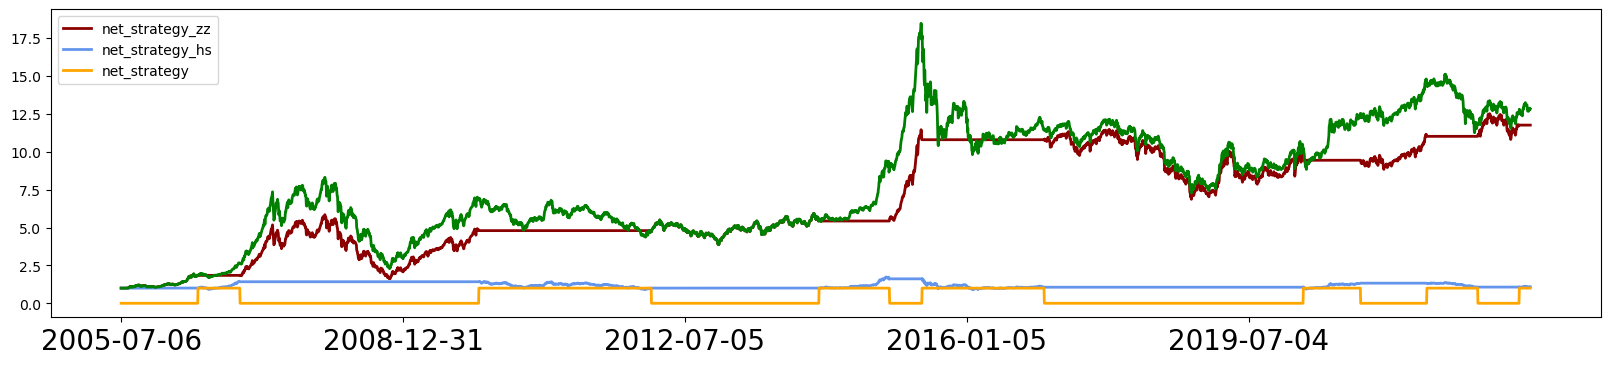

In [199]:
#拿序列代替时间
X = np.arange(finalData.shape[0])
xticklabel = finalData.index
xticks = np.arange(0,finalData.shape[0],np.int((finalData.shape[0]+1)/5))

plt.figure(figsize = [20,4])

SP3 = plt.axes() 
p1 = SP3.plot(X,finalData['net_strategy_zz'],linewidth = 2,label = 'net_strategy_zz',color = 'darkred')
p2 = SP3.plot(X,finalData['net_strategy_hs'],linewidth = 2,label = 'net_strategy_hs',color = 'cornflowerblue')
p3 = SP3.plot(X,finalData['net_strategy'],linewidth = 2,label = 'net_strategy',color = 'g')
p4 = SP3.plot(X,finalData['flag_hs'],color = 'orange',linewidth = 2,label = 'flag_hs')   

SP3.set_xticks(xticks)
SP3.set_xticklabels(xticklabel[xticks],size = 20)

output1 = p1+p2+p3+p4
lns = [l.get_label() for l in output1]

plt.legend(p,lns)
plt.show()

In [ ]:
#未做完部分
##将作图封装为一个函数